## PVT <a class="anchor" id="pvt"></a>

In [1]:
df1 = pd.read_csv(data_dir + 'dataset_2021-08-06.csv')
df1 = df1.set_index('subject')
df1

NameError: name 'pd' is not defined

In [143]:
pvt = pd.read_csv(data_dir + 'pvt/pvt_results.csv', names = ['subject', 'RT', 'FS', 'NR'], header=None, skiprows=1)
pvt = pvt.set_index('subject')
pvt

,RT,FS,NR
subject,,,
10014,0.343802,6.0,0.0
20105,0.284249,1.0,0.0
10057,0.337248,5.0,0.0
10057,0.303964,3.0,0.0
10062,0.316575,1.0,0.0
10035,0.267186,1.0,0.0
10033,0.343700,0.0,0.0
10025,0.245413,1.0,0.0
20113,0.265601,0.0,0.0


In [144]:
df1 = df1.join(pvt, how = 'outer')
df1 = df1.drop_duplicates('RT')

In [145]:
df1 = df1.groupby('subject').min('RT').reset_index().set_index('subject')

In [146]:
df1[df1['RT'] > 1][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
20123,65000.000000,0.0,13.0
20125,802.881283,9.0,1.0
20129,774.142121,3.0,1.0


In [147]:
df1[df1['FS'] > 10][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
10148,0.532984,27.0,0.0
10149,0.435698,15.0,0.0
10151,0.512348,12.0,0.0
20168,0.527518,26.0,0.0


In [38]:
df1[df1['NR'] > 0][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
20123,65000.000000,0.0,13.0
20125,802.881283,9.0,1.0
20129,774.142121,3.0,1.0


In [39]:
df1.drop(['10148', '10149', '10151', '20168', '20123', '20125', '20129'], axis=0)[df1.columns[df1.columns.str.contains('7_act|RT|FS|NR')].to_list()].corr(method='spearman')[['RT', 'FS', 'NR']]


,RT,FS,NR
actmin_7_act,-0.262955,0.204089,NaN
amp_7_act,0.141392,-0.134329,NaN
alpha_7_act,0.190081,-0.024177,NaN
beta_7_act,-0.174899,0.063006,NaN
phi_7_act,-0.322874,0.069914,NaN
actmin_7_act_norm,0.221053,0.248780,NaN
amp_7_act_norm,0.251822,0.132501,NaN
alpha_7_act_norm,0.196154,-0.190588,NaN
beta_7_act_norm,0.182389,-0.166411,NaN
phi_7_act_norm,0.200202,0.206078,NaN


In [40]:
df1.drop(['10148', '10149', '10151', '20168', '20123', '20125', '20129'], axis=0)[df1.columns[df1.columns.str.contains('7_fit|RT|FS|NR')].to_list()].corr(method='spearman')[['RT', 'FS', 'NR']]



,RT,FS,NR
actmin_7_fit,-0.122661,-0.052942,NaN
amp_7_fit,-0.003830,0.072218,NaN
alpha_7_fit,0.128351,0.028001,NaN
beta_7_fit,-0.060948,-0.050448,NaN
phi_7_fit,-0.002079,0.071534,NaN
actmin_7_fit_norm,-0.313182,-0.052323,NaN
amp_7_fit_norm,-0.166904,-0.110924,NaN
alpha_7_fit_norm,0.047179,-0.176296,NaN
beta_7_fit_norm,0.056188,-0.166324,NaN
phi_7_fit_norm,-0.133239,0.382632,NaN


In [41]:
dfpvt = df1.drop(['10148', '10149', '10151', '20168', '20123', '20125', '20129'], axis=0)

In [42]:
# df1 = df1.drop('RT_zscore', axis=1)
dfpvt = dfpvt.drop('RT_zscore', axis=1)

KeyError: "['RT_zscore'] not found in axis"

In [43]:
from scipy.stats import zscore
dfpvt = dfpvt.join(dfpvt.groupby(['age_group'])['RT'].apply(lambda x : zscore(x,ddof=1, nan_policy='omit')).reset_index().set_index('subject'), lsuffix='', rsuffix='_zscore')


In [44]:
dfpvt['RT_zscore']

subject
10011   -0.610053
10012   -0.514347
10014    0.555673
10016         NaN
10023   -0.444028
10024   -0.623892
10025   -1.484025
10033    0.553570
10035   -1.032660
10038   -0.957150
10045    0.463260
10049   -0.753423
10057   -0.270205
10062   -0.008776
10076         NaN
10139   -0.429915
10140    0.131758
10143    2.950498
10144    0.484350
10146    0.979425
10152    1.009941
20076    1.138306
20103   -1.075844
20105   -0.954379
20108   -1.777105
20113   -1.376600
20115    1.710554
20120   -0.340942
20122    0.274859
20127    0.611304
20131   -1.422664
20142    0.158326
20154    0.408032
20155   -0.693051
20157    1.459903
20163    1.161215
20176    0.367138
20178    0.487169
20180   -0.046927
20181   -0.634988
20182   -0.430487
20184    0.976180
test          NaN
Name: RT_zscore, dtype: float64

<AxesSubplot:xlabel='amp_7_fit_norm', ylabel='amp_7_fit'>

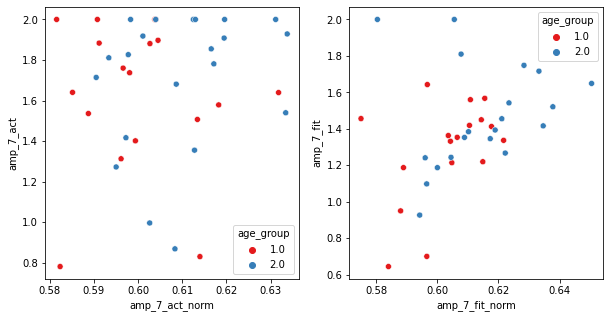

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

dfpvt = dfpvt[dfpvt['amp_7_act_norm'] > 0.5]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'amp_7_act_norm', y = 'amp_7_act', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'amp_7_fit_norm', y = 'amp_7_fit', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')


<AxesSubplot:xlabel='phi_7_fit_norm', ylabel='phi_7_fit'>

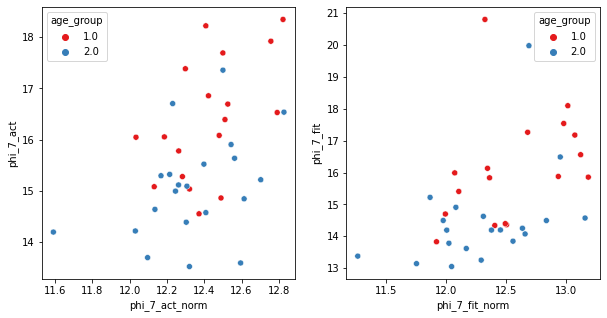

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'phi_7_act_norm', y = 'phi_7_act', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'phi_7_fit_norm', y = 'phi_7_fit', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')


<AxesSubplot:xlabel='amp_7_fit_norm', ylabel='RT_zscore'>

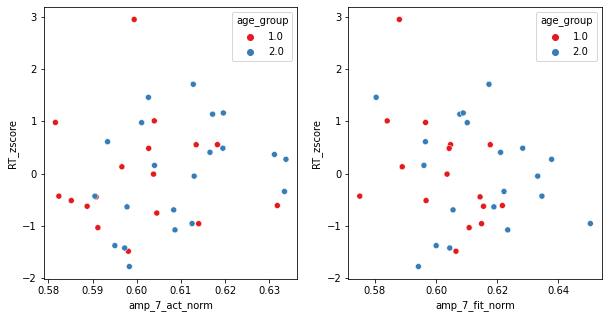

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'amp_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'amp_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')


Actiwatch correlation                 phi_7_act_norm        RT
phi_7_act_norm        1.000000  0.139951
RT                    0.139951  1.000000 
 Fitbit correlation                 phi_7_fit_norm        RT
phi_7_fit_norm        1.000000 -0.158139
RT                   -0.158139  1.000000 



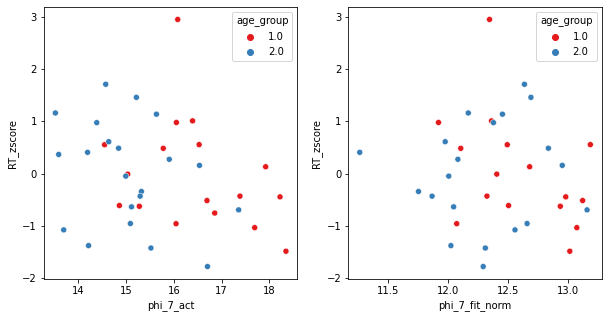

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'phi_7_act', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'phi_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
print('Actiwatch correlation %s \n Fitbit correlation %s \n' %(dfpvt[['phi_7_act_norm', 'RT']].corr(), dfpvt[['phi_7_fit_norm', 'RT']].corr()))


Actiwatch correlation                IS_7_act_norm        RT
IS_7_act_norm       1.000000  0.179102
RT                  0.179102  1.000000 
 Fitbit correlation                IS_7_fit_norm        RT
IS_7_fit_norm       1.000000  0.263154
RT                  0.263154  1.000000 



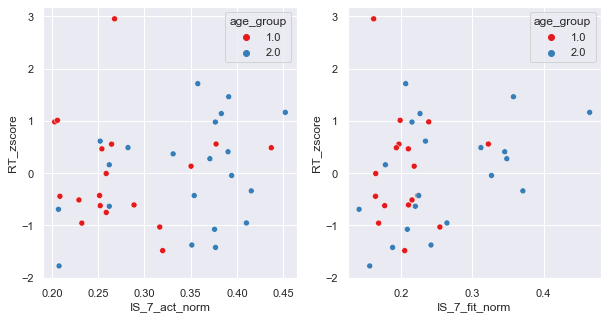

In [97]:
import pingouin as pg
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'IS_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'IS_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
print('Actiwatch correlation %s \n Fitbit correlation %s \n' %(dfpvt[['IS_7_act_norm', 'RT']].corr(), dfpvt[['IS_7_fit_norm', 'RT']].corr()))


<AxesSubplot:xlabel='IV_7_fit_norm', ylabel='RT_zscore'>

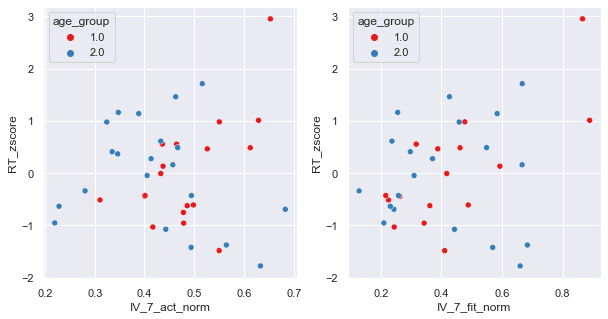

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'IV_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'IV_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')




<AxesSubplot:xlabel='RA_7_fit_norm', ylabel='RT_zscore'>

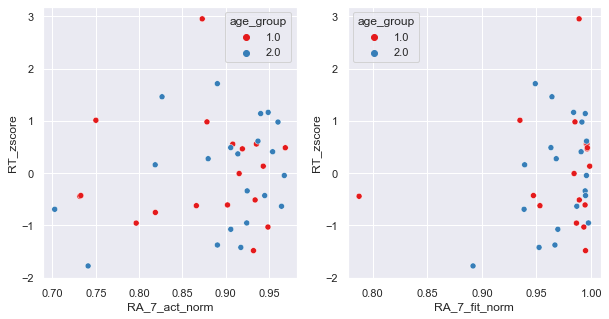

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'RA_7_act_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'RA_7_fit_norm', y = 'RT_zscore', hue = 'age_group', ci=95, data = dfpvt, palette = 'Set1')




In [148]:
diary = pd.read_csv(data_dir + "sleep_diaries/sleep_diaries_all.csv", usecols = ['record_id', 'sleep_quality'])
diary.columns = ['subject', 'sleep_quality']

sleep_ratings = [1, 2, 3, 4, 5]
sleep_ratings_descr = ["Very poorly", "Poorly", "Mediocre", "Well", "Very well"]
diary.sleep_quality = diary.sleep_quality.replace(sleep_ratings_descr, sleep_ratings).dropna().astype(float)
diary[diary.sleep_quality == "Well"]



,subject,sleep_quality


In [121]:
diary_mean = diary.groupby('subject').mean()

In [149]:
#dfd = df1.drop('sleep_quality', axis = 1)
dfd = df1.join(diary_mean, how = 'outer')
dfd

,age_group,handedness,gender,actiwatch_arm,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,actmin_10_act,...,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_10_fit_norm,M10_10_fit_norm,beiwe,RT,FS,NR,sleep_quality
subject,,,,,,,,,,,,,,,,,,,,,
10011,1.0,2.0,2.0,2.0,1.175643,1.639328,-0.731704,409.618573,14.860625,1.363736,...,0.170234,0.537293,0.995893,0.000217,0.105243,1.0,0.287571,0.0,0.0,NaN
10012,1.0,1.0,2.0,1.0,1.236987,1.640366,-0.680088,18.988752,16.694780,1.596863,...,0.215777,0.224610,0.989213,0.000522,0.096201,0.0,0.292187,3.0,0.0,NaN
10014,1.0,2.0,2.0,2.0,1.256265,1.578544,-0.693218,14.231289,16.530233,1.362734,...,0.322627,0.316041,0.995594,0.000233,0.105333,0.0,0.343802,6.0,0.0,NaN
10016,1.0,2.0,2.0,1.0,1.625128,1.312806,-0.702707,46.358950,15.080765,1.935143,...,0.169532,0.209467,0.980336,0.000904,0.091073,0.0,NaN,NaN,NaN,NaN
10023,1.0,2.0,1.0,1.0,0.874169,2.000000,-0.947025,13.167707,18.223667,0.917005,...,0.136185,0.233504,0.808852,0.010981,0.103910,1.0,0.295579,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000
20180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.454545
20181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.545455


In [152]:
dfd.dropna(subset = ["sleep_quality"])[dfd.columns[dfd.columns.str.contains('7_fit_norm|7_act_norm|sleep_quality')].to_list()].corr(method='spearman')[dfd.columns[dfd.columns.str.contains('sleep_quality')].to_list()[0:5]][0:5]


,sleep_quality
actmin_7_act_norm,NaN
amp_7_act_norm,NaN
alpha_7_act_norm,NaN
beta_7_act_norm,NaN
phi_7_act_norm,NaN


In [128]:
dfcor2.sleep_quality

subject
10011    3.636364
10012         NaN
10014         NaN
10016         NaN
10023    5.000000
           ...   
20180         NaN
20181         NaN
20182         NaN
20184         NaN
test          NaN
Name: sleep_quality, Length: 104, dtype: float64